<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/009%E5%B0%8F%E7%BA%A2%E4%B9%A6%E9%94%80%E5%94%AE%E9%A2%9D%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 课题背景
小红书是—个生活方式平台和消费决第入口，是当前著名的电商平台，和其他电商平台不同 小红书是从社区起家。在小红书社区， 用户通过文字、图片、视颉笔记的分享，记录了这个时代年轻人的正能里和美好生活。

2014年10月小红书福利社上线，旨在解决海外购物的另一个难题：买不到。小红书通过机器学习对海量信息和人进行精准、高效匹配，已累积海罢的海外购物数据，分析出最受欢迎的商品及全球购物趋势，并仕此基础上把全世界的好东西，以最短的路径、最简洁的方式提供给用户。

本节将根据小红书的数据利用Python进行线性回归，对小红书的销售额进行预测。

# 数据字典
Revenue 用户的下单购买金额（预测目标）

3rd_party_stores 用户过往在app中从第三方商家购买的数量，为0则代表只在自营产品中购买

Gender 性别:1-男，0-女，未知则空缺

Age 年龄，未知为空缺

Engaged_last_30 最近30天在app上有参与重点活动（讨论，买家秀等等）

Lifecycle 生命周期分类为A,B,C（分别对应注册后6个月内，1年内，2年内)

days_since_last_order 最近一次下单距今的天数（小于1则代表当天有下单）

previous_order_amount 以往累积的用户购买金额

# 1. 数据概况分析

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
red = pd.read_csv('/content/31 l2_week2.csv')
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      16716 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
red.isnull().sum()

revenue                        0
gender                     11729
age                        12736
engaged_last_30            11729
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

In [ ]:
red.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [ ]:
#缺失值处理
red['age'] = red['age'].fillna(red['age'].median())
red['gender'] = red['gender'].fillna('Unknown')
red['engaged_last_30'] = red['engaged_last_30'].fillna('Unknown')

In [ ]:
red1 = pd.get_dummies(red)
red1.head()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_Unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_Unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,59.0,4.26,2343.870,0,0,1,0,1,0,0,0,1,0
1,200.99,51.0,0.94,8539.872,0,0,1,0,1,0,0,1,0,0
2,69.98,79.0,4.29,1687.646,1,0,1,0,1,0,0,0,0,1
3,649.99,60.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,60.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1


# 2. 数据可视化

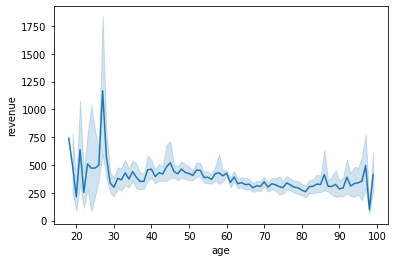

In [ ]:
sns.lineplot(x='age',y='revenue',data=red)

（1） 销售额在20-30岁之间是最高的，30岁之后的销售额相对平稳

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


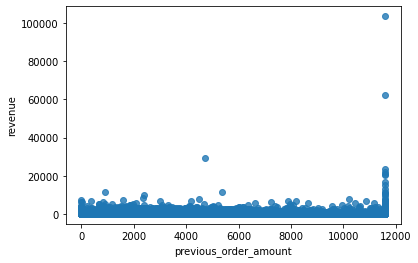

In [ ]:
sns.regplot('previous_order_amount','revenue',data=red)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


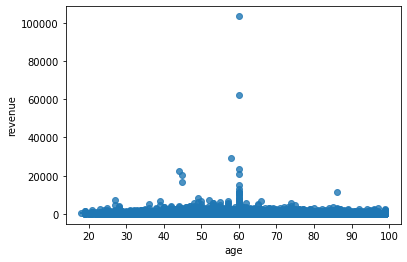

In [ ]:
sns.regplot('age','revenue',data=red)

（2）根据上图，年龄、累计金额与销售额未显示出线性关系，同时，由于某些销售额过高导致无法区分销售额主要集中在哪个区间。

In [ ]:
bins=[0,100,1000,1200,1500,2000,5000,10000,100000]
red1['revenue_level'] = pd.cut(red1['revenue'],bins,right=False)
red1.groupby('revenue_level').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
revenue_level,,,,,,,,
"[0, 100)",9970.0,56.737771,24.530894,0.02,35.990,57.980,74.9900,99.99
"[100, 1000)",16761.0,369.924863,242.519685,100.00,158.150,289.000,537.9900,999.99
"[1000, 1200)",796.0,1098.275573,59.316398,1000.06,1049.000,1097.300,1149.6200,1199.99
"[1200, 1500)",755.0,1341.604563,88.727190,1200.00,1266.985,1338.940,1415.9600,1499.99
"[1500, 2000)",584.0,1713.847178,142.700321,1500.01,1594.795,1691.110,1827.6725,1999.95
"[2000, 5000)",532.0,2707.051090,657.146959,2000.04,2221.240,2496.435,3015.7075,4970.42
"[5000, 10000)",39.0,6485.890769,1196.145429,5031.49,5545.200,6301.930,7086.7800,9983.28
"[10000, 100000)",14.0,19985.749286,13404.103018,10689.11,11471.215,15907.315,21928.2325,62100.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


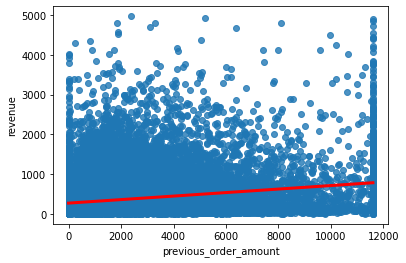

In [ ]:
#根据上表可知，5000元以上的销售额数量很小，因此筛选出销售额小于5000元的数据进行分析
red2=red1[red1['revenue']<5001]
sns.regplot('previous_order_amount','revenue',data=red2,line_kws={'color':'red','lw':3})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


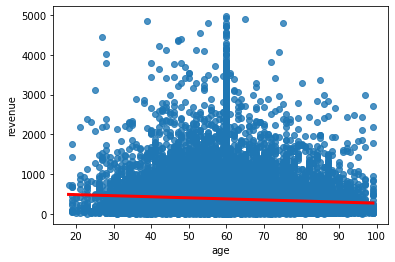

In [ ]:
sns.regplot('age','revenue',data=red2,line_kws={'color':'red','lw':3})

# 3. 模型构建

In [ ]:
a=red1.corr()[['revenue']].sort_values('revenue',ascending=False)
a

,revenue
revenue,1.000000
previous_order_amount,0.168540
engaged_last_30_1.0,0.038287
days_since_last_order,0.036654
gender_Unknown,0.017722
engaged_last_30_Unknown,0.017722
lifecycle_A,0.013683
lifecycle_C,-0.002221
lifecycle_B,-0.008651
gender_1.0,-0.012422


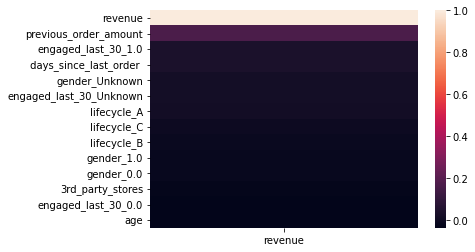

In [ ]:
sns.heatmap(a)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=red2[['previous_order_amount']]
y=red2['revenue']
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([0.04417161])

In [ ]:
model.intercept_

274.0315166158015

In [ ]:
from statsmodels.formula.api import ols
y=red2['revenue']
x=red2[['previous_order_amount']]
model = ols('y~x',red2).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1348.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.73e-288
Time:                        06:06:24   Log-Likelihood:            -2.2368e+05
No. Observations:               29398   AIC:                         4.474e+05
Df Residuals:                   29396   BIC:                         4.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    274.0315      4.002     68.469      0.0

In [ ]:
model = LinearRegression()
x=red2[['previous_order_amount','engaged_last_30_1.0',' days_since_last_order ']]
y=red2['revenue']
model = ols('y~x',red2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     574.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        06:25:37   Log-Likelihood:            -2.2350e+05
No. Observations:               29398   AIC:                         4.470e+05
Df Residuals:                   29394   BIC:                         4.470e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    206.1000      5.376     38.337      0.0

R方提升到0.055，依然很小，但误差减小了

销售额=206.1 + 0.0454*previous_order_amount + 48.95*engaged_last_30_1.0 + 8.15*days_since_last_order

## 结论

* 最近30天参与重点活动的客户每增加1个，可获得58.95元的销售额回报；
* 最近一次距今下单天数每增加1天，可获得8.15元的销售额回报；

**综上，我们需要寻找累计销售额越高、最近三十天有在app上参与重点讨论，距今下单天数越长的用户,向这些用户展开营销活动，查看其消费情况，做进一步的测试。**
